# APT with Fama–French-Carhart Four-Factor Model

<img src="factormodel.png" style="width:500px;height:300px">

In [1]:
import pandas_datareader as pdr
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import tensorflow as tf

In [3]:
tickers_data = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
tickers_data.loc[:,'Symbol'] = tickers_data.loc[:,'Symbol'].apply(lambda x:str(x).replace('.', '-' ))
tickers_data.head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [4]:
start = '2010-01-01'
end = '2020-01-01'

In [5]:
tickers = yf.Tickers(list(tickers_data.loc[:,'Symbol']))

data = tickers.history(start=start, end=end, auto_adjust=False, interval='1d')
data = data.stack(level=1).rename_axis(['Date', 'Ticker']).reset_index(level=1)
data['Date'] = data.index
data = data.reset_index(drop=True)
data.head()

[*********************100%%**********************]  503 of 503 completed


10 Failed downloads:
['PPL', 'BF.B']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2010-01-01 -> 2020-01-01)')
['KVUE', 'GEHC', 'OTIS', 'CEG', 'CARR', 'VLTO', 'ABNB']: Exception("%ticker%: Data doesn't exist for startDate = 1262322000, endDate = 1577854800")
['BRK.B']: Exception('%ticker%: No timezone found, symbol may be delisted')


,Ticker,Adj Close,Close,Dividends,High,Low,Open,Stock Splits,Volume,Date
0,A,20.189005,22.389128,0.0,22.625179,22.267525,22.453505,0.0,3815561.0,2010-01-04
1,AAL,4.496877,4.770000,0.0,4.940000,4.660000,4.840000,0.0,9837300.0,2010-01-04
2,AAPL,6.487535,7.643214,0.0,7.660714,7.585000,7.622500,0.0,493729600.0,2010-01-04
3,ABT,19.138163,26.129908,0.0,26.177889,25.870815,26.000362,0.0,10829095.0,2010-01-04
4,ACGL,7.994444,7.994444,0.0,8.022222,7.972222,7.978889,0.0,4813200.0,2010-01-04


In [6]:
adj_close = data.pivot(index='Date', columns='Ticker', values='Adj Close')
adj_close = adj_close.dropna(axis=1)
adj_close.head()

Ticker,A,AAL,AAPL,ABT,ACGL,ACN,ADBE,ADI,ADM,ADP,...,WTW,WY,WYNN,XEL,XOM,XRAY,YUM,ZBH,ZBRA,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,20.189005,4.496877,6.487535,19.138163,7.994444,32.455276,37.090000,22.743202,22.142736,27.043217,...,53.240768,10.065865,41.758167,13.167749,40.983097,31.877609,19.345047,52.791031,28.670000,10.726548
2010-01-05,19.969696,5.005958,6.498750,18.983538,7.967778,32.655842,37.700001,22.707294,22.262346,26.897995,...,53.121433,10.279554,44.297867,13.011591,41.143116,31.498650,19.278887,54.462189,28.620001,11.104750
2010-01-06,19.898741,4.798554,6.395378,19.088968,7.933333,33.003002,37.619999,22.664206,22.206055,26.834860,...,53.976624,10.165890,43.716797,13.036571,41.498737,31.706169,19.141068,54.444607,28.400000,12.070378
2010-01-07,19.872948,4.939965,6.383557,19.247105,7.886667,32.972153,36.889999,22.484673,21.973873,26.822231,...,53.817532,10.120424,44.650429,12.980356,41.368355,32.121220,19.135550,55.693577,27.690001,13.422265
2010-01-08,19.866499,4.845692,6.425997,19.345507,7.871111,32.841007,36.689999,22.613935,21.699459,26.784346,...,53.757847,10.027223,44.330490,12.986602,41.202393,32.121220,19.141068,54.523750,27.600000,13.204995


-----

In [6]:
tickers.tickers['AAPL'].info

{'address1': 'One Apple Park Way',
 'city': 'Cupertino',
 'state': 'CA',
 'zip': '95014',
 'country': 'United States',
 'phone': '408 996 1010',
 'website': 'https://www.apple.com',
 'industry': 'Consumer Electronics',
 'industryKey': 'consumer-electronics',
 'industryDisp': 'Consumer Electronics',
 'sector': 'Technology',
 'sectorKey': 'technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, and HomePod. It also provides AppleCare support and cloud services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and pod

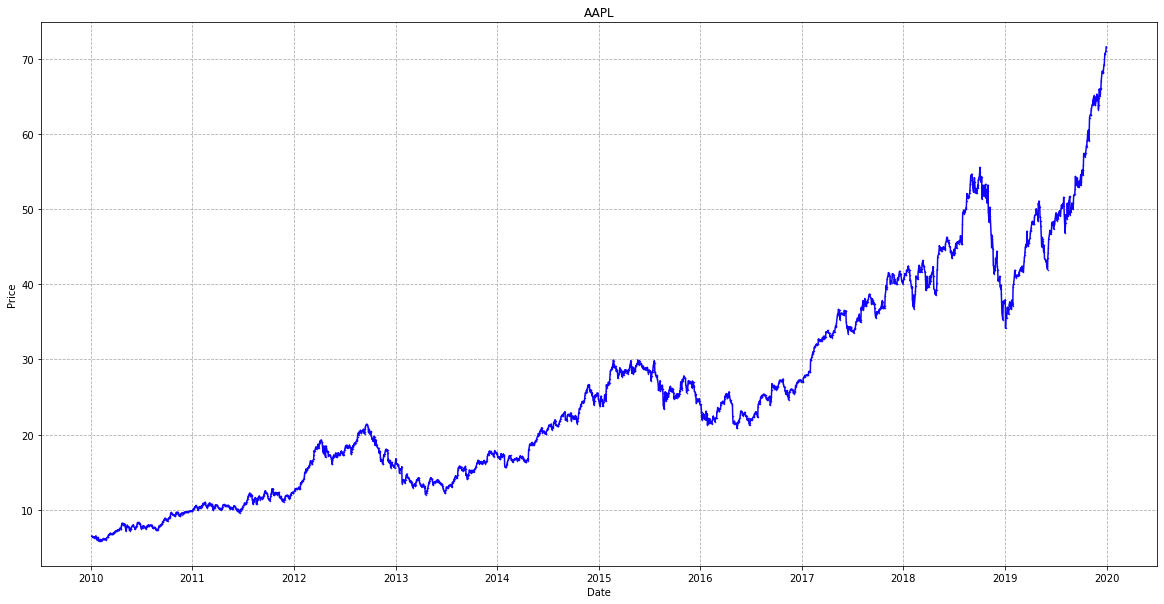

In [8]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 1, 1)
ax.grid(visible=True, linestyle='--')
ax.set_title('AAPL')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.plot(adj_close.index, adj_close.loc[:,['AAPL']].values, marker='.', color='#0F00FF', markersize=1, linestyle='-')

-----

In [9]:
pdr.famafrench.get_available_datasets()

['F-F_Research_Data_Factors',
 'F-F_Research_Data_Factors_weekly',
 'F-F_Research_Data_Factors_daily',
 'F-F_Research_Data_5_Factors_2x3',
 'F-F_Research_Data_5_Factors_2x3_daily',
 'Portfolios_Formed_on_ME',
 'Portfolios_Formed_on_ME_Wout_Div',
 'Portfolios_Formed_on_ME_Daily',
 'Portfolios_Formed_on_BE-ME',
 'Portfolios_Formed_on_BE-ME_Wout_Div',
 'Portfolios_Formed_on_BE-ME_Daily',
 'Portfolios_Formed_on_OP',
 'Portfolios_Formed_on_OP_Wout_Div',
 'Portfolios_Formed_on_OP_Daily',
 'Portfolios_Formed_on_INV',
 'Portfolios_Formed_on_INV_Wout_Div',
 'Portfolios_Formed_on_INV_Daily',
 '6_Portfolios_2x3',
 '6_Portfolios_2x3_Wout_Div',
 '6_Portfolios_2x3_weekly',
 '6_Portfolios_2x3_daily',
 '25_Portfolios_5x5',
 '25_Portfolios_5x5_Wout_Div',
 '25_Portfolios_5x5_Daily',
 '100_Portfolios_10x10',
 '100_Portfolios_10x10_Wout_Div',
 '100_Portfolios_10x10_Daily',
 '6_Portfolios_ME_OP_2x3',
 '6_Portfolios_ME_OP_2x3_Wout_Div',
 '6_Portfolios_ME_OP_2x3_daily',
 '25_Portfolios_ME_OP_5x5',
 '25_Portf

In [10]:
ff = pdr.famafrench.FamaFrenchReader('F-F_Research_Data_Factors_daily', start=start, end=end).read()[0]
ff.head()

,Mkt-RF,SMB,HML,RF
Date,,,,
2010-01-04,1.69,0.61,1.13,0.0
2010-01-05,0.31,-0.64,1.24,0.0
2010-01-06,0.13,-0.22,0.57,0.0
2010-01-07,0.40,0.09,0.98,0.0
2010-01-08,0.33,0.37,0.01,0.0


In [11]:
m = pdr.famafrench.FamaFrenchReader('F-F_Momentum_Factor_daily', start=start, end=end).read()[0]
m.head()

,Mom
Date,
2010-01-04,0.59
2010-01-05,0.64
2010-01-06,-0.04
2010-01-07,-0.85
2010-01-08,0.20


In [12]:
factors = pd.merge(ff, m, how='inner', on='Date')
factors = factors.drop('RF', axis=1)
factors.head()

,Mkt-RF,SMB,HML,Mom
Date,,,,
2010-01-04,1.69,0.61,1.13,0.59
2010-01-05,0.31,-0.64,1.24,0.64
2010-01-06,0.13,-0.22,0.57,-0.04
2010-01-07,0.40,0.09,0.98,-0.85
2010-01-08,0.33,0.37,0.01,0.20


In [13]:
factors.describe()

,Mkt-RF,SMB,HML,Mom
count,2516.000000,2516.000000,2516.000000,2516.000000
mean,0.053116,-0.000612,-0.009106,0.016820
std,0.958650,0.519260,0.505761,0.694955
min,-6.970000,-2.000000,-1.900000,-3.830000
25%,-0.352500,-0.330000,-0.320000,-0.360000
50%,0.070000,0.000000,-0.030000,0.050000
75%,0.532500,0.320000,0.270000,0.420000
max,5.060000,3.590000,3.060000,3.610000


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

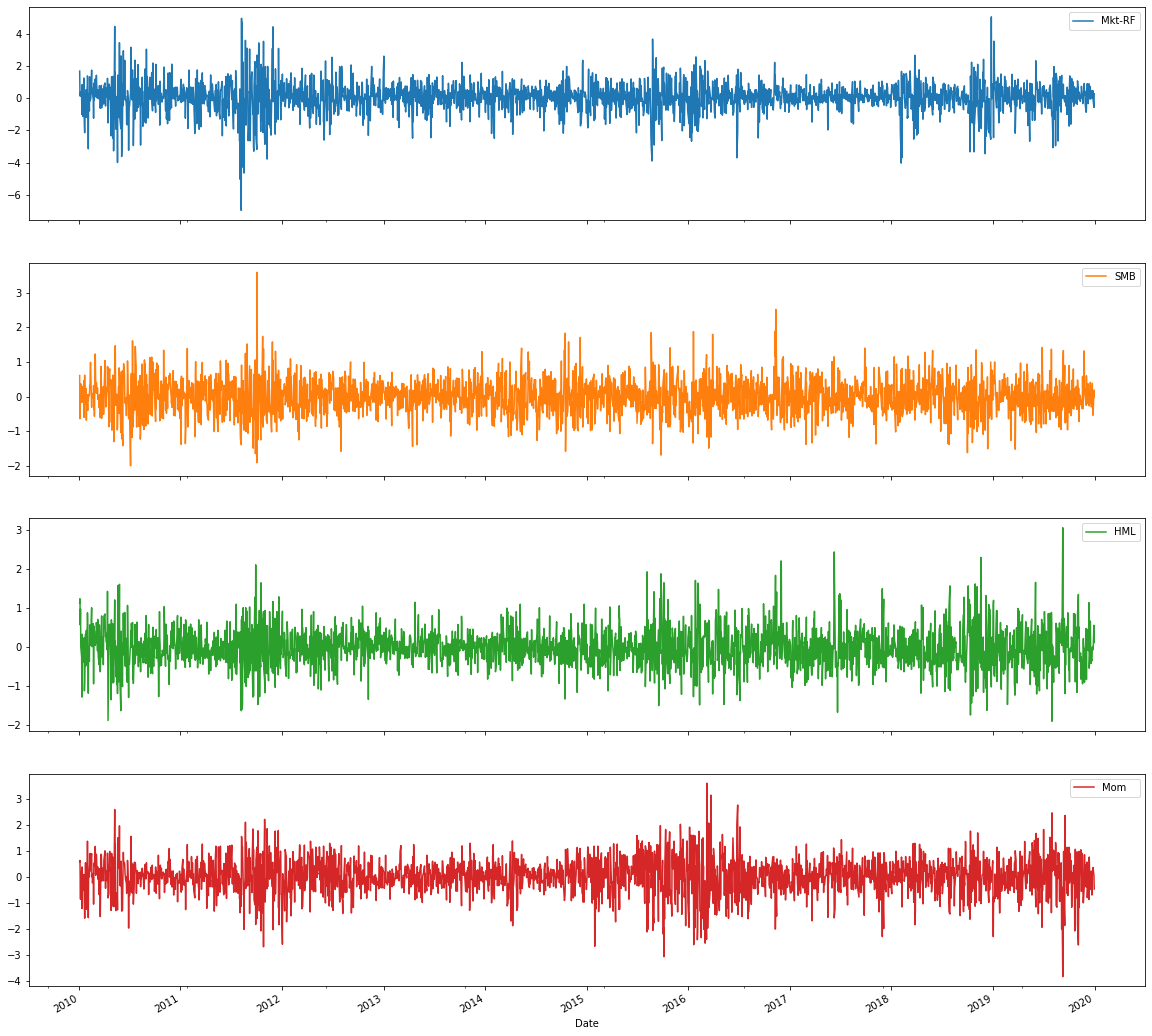

In [14]:
factors.plot(subplots=True, figsize=(20,20))

-----

In [15]:
returns = ((adj_close - adj_close.shift(1))/adj_close.shift(1)).iloc[1:,:]
returns.head()

Ticker,A,AAL,AAPL,ABT,ACGL,ACN,ADBE,ADI,ADM,ADP,...,WTW,WY,WYNN,XEL,XOM,XRAY,YUM,ZBH,ZBRA,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-05,-0.010862,0.113207,0.001729,-0.008080,-0.003336,0.006180,0.016446,-0.001579,0.005402,-0.005370,...,-0.002241,0.021229,0.060820,-0.011860,0.003904,-0.011888,-0.003420,0.031656,-0.001744,0.035259
2010-01-06,-0.003553,-0.041431,-0.015906,0.005554,-0.004323,0.010631,-0.002122,-0.001898,-0.002528,-0.002347,...,0.016099,-0.011057,-0.013118,0.001920,0.008643,0.006589,-0.007149,-0.000323,-0.007687,0.086956
2010-01-07,-0.001297,0.029469,-0.001849,0.008284,-0.005882,-0.000935,-0.019405,-0.007921,-0.010456,-0.000470,...,-0.002948,-0.004473,0.021356,-0.004312,-0.003142,0.013090,-0.000288,0.022940,-0.025000,0.112000
2010-01-08,-0.000324,-0.019084,0.006649,0.005113,-0.001972,-0.003977,-0.005422,0.005749,-0.012488,-0.001413,...,-0.001109,-0.009208,-0.007165,0.000482,-0.004012,0.000000,0.000288,-0.021004,-0.003250,-0.016187
2010-01-11,0.000649,-0.019455,-0.008822,0.005086,-0.003106,-0.000940,-0.013083,-0.005716,0.000648,0.004479,...,0.009989,0.006574,-0.003240,0.009620,0.011220,0.012922,0.017281,0.022100,0.003261,0.006094


-----

In [16]:
F = factors.values[1:,:]
R = returns.values - ff.loc[:,['RF']].values[1:,:]

In [17]:
N = returns.values.shape[0]*80//100

F_train = F[:N,:]
R_train = R[:N,:]

F_test = F[N:,:]
R_test = R[N:,:]

In [18]:
def Model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(units=R_train.shape[1],
                              activation='linear',
                              kernel_initializer='glorot_uniform',
                              use_bias=False,
                              input_shape=[F_train.shape[1]])
    ])
    loss = tf.keras.losses.MeanSquaredError()
    metric = tf.keras.metrics.MeanAbsoluteError()
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01, 
                                         beta_1=0.9, 
                                         beta_2=0.999, 
                                         epsilon=1e-07)
    model.compile(loss=loss, metrics=[metric], optimizer=optimizer)
    model.summary()
    callback1 = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', 
                                                     patience=100,
                                                     min_delta=0.001,
                                                     factor=0.1, 
                                                     min_lr=0.0001)
    callback2 = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                                 patience=200,
                                                 min_delta=0.001)
    model.fit(F_train, R_train, epochs=1000, batch_size=64, callbacks=[callback1, callback2], verbose=True)
    return model

In [19]:
model = Model()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 436)               1744      
                                                                 
Total params: 1,744
Trainable params: 1,744
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
32/32 [==============================] - 0s 555us/step - loss: 0.0014 - mean_absolute_error: 0.0231 - lr: 0.0100
Epoch 2/1000
 1/32 [..............................] - ETA: 0s - loss: 2.4306e-04 - mean_absolute_error: 0.0108

2023-10-29 03:54:45.159393: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


32/32 [==============================] - 0s 544us/step - loss: 2.1518e-04 - mean_absolute_error: 0.0098 - lr: 0.0100
Epoch 3/1000
32/32 [==============================] - 0s 542us/step - loss: 1.8586e-04 - mean_absolute_error: 0.0088 - lr: 0.0100
Epoch 4/1000
32/32 [==============================] - 0s 492us/step - loss: 1.8532e-04 - mean_absolute_error: 0.0088 - lr: 0.0100
Epoch 5/1000
32/32 [==============================] - 0s 482us/step - loss: 1.8601e-04 - mean_absolute_error: 0.0088 - lr: 0.0100
Epoch 6/1000
32/32 [==============================] - 0s 478us/step - loss: 1.8758e-04 - mean_absolute_error: 0.0089 - lr: 0.0100
Epoch 7/1000
32/32 [==============================] - 0s 506us/step - loss: 1.8707e-04 - mean_absolute_error: 0.0088 - lr: 0.0100
Epoch 8/1000
32/32 [==============================] - 0s 499us/step - loss: 1.8757e-04 - mean_absolute_error: 0.0089 - lr: 0.0100
Epoch 9/1000
32/32 [==============================] - 0s 477us/step - loss: 1.8783e-04 - mean_absolute_

32/32 [==============================] - 0s 466us/step - loss: 1.8003e-04 - mean_absolute_error: 0.0086 - lr: 1.0000e-03
Epoch 126/1000
32/32 [==============================] - 0s 465us/step - loss: 1.7996e-04 - mean_absolute_error: 0.0086 - lr: 1.0000e-03
Epoch 127/1000
32/32 [==============================] - 0s 459us/step - loss: 1.8001e-04 - mean_absolute_error: 0.0086 - lr: 1.0000e-03
Epoch 128/1000
32/32 [==============================] - 0s 462us/step - loss: 1.7991e-04 - mean_absolute_error: 0.0086 - lr: 1.0000e-03
Epoch 129/1000
32/32 [==============================] - 0s 485us/step - loss: 1.7998e-04 - mean_absolute_error: 0.0086 - lr: 1.0000e-03
Epoch 130/1000
32/32 [==============================] - 0s 472us/step - loss: 1.8016e-04 - mean_absolute_error: 0.0086 - lr: 1.0000e-03
Epoch 131/1000
32/32 [==============================] - 0s 464us/step - loss: 1.8003e-04 - mean_absolute_error: 0.0086 - lr: 1.0000e-03
Epoch 132/1000
32/32 [==============================] - 0s 473u

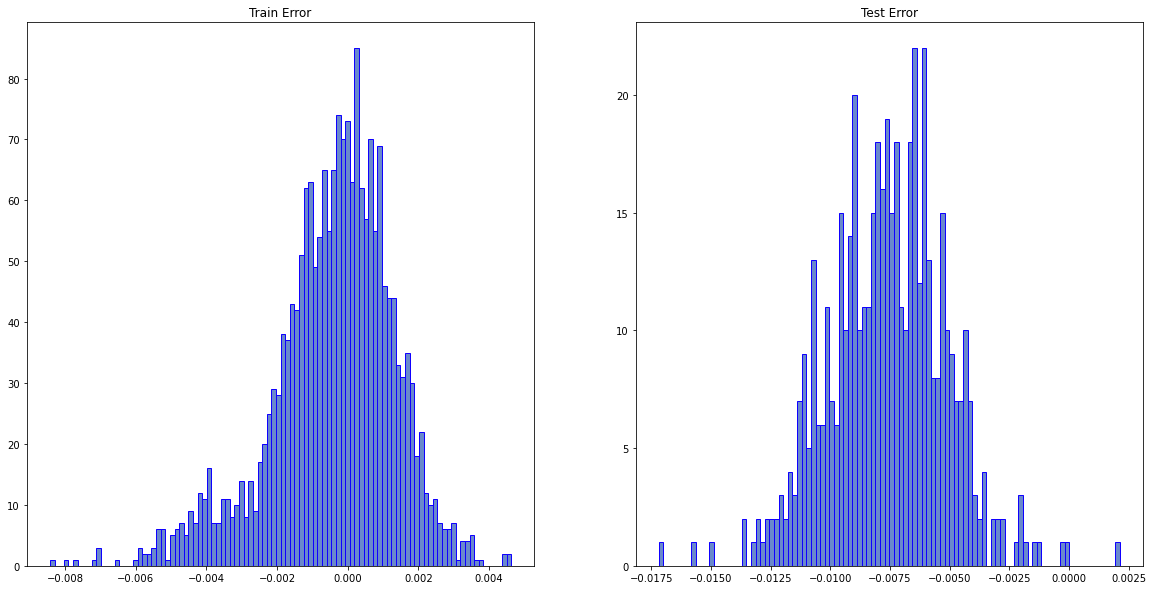

In [20]:
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title('Train Error')
_ = ax1.hist(np.mean(R_train-model.predict(F_train), axis=1), bins=100, color='#6A89CC', edgecolor='#0F00FF')
ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title('Test Error')
_ = ax2.hist(np.mean(R_test-model.predict(F_test), axis=1), bins=100, color='#6A89CC', edgecolor='#0F00FF')

-----

In [21]:
B = model.weights[0].numpy().T
B

array([[ 1.43301822e-02, -4.60585230e-04, -2.56374851e-03,
        -1.39371702e-03],
       [ 1.42931165e-02,  5.51021053e-03,  3.84500250e-03,
         2.44562165e-03],
       [ 1.05774896e-02, -5.20074915e-04, -5.56320231e-03,
         2.05903547e-03],
       ...,
       [ 9.39337723e-03, -1.45747978e-03, -3.19966953e-03,
        -2.57739521e-06],
       [ 1.22902514e-02,  6.22610515e-03, -2.23748130e-03,
        -2.40897527e-03],
       [ 1.20575447e-02,  2.03495682e-03,  1.52458735e-02,
        -4.74770932e-04]], dtype=float32)

In [22]:
S = R-model.predict(F)
S

array([[-1.15284196e-02,  1.05970114e-01,  3.69796619e-03, ...,
         3.17805998e-02,  2.74699350e-03,  1.42225079e-02],
       [-4.11181069e-03, -4.41706776e-02, -1.41421933e-02, ...,
        -4.11144681e-05, -6.73595884e-03,  7.71271747e-02],
       [-5.65988486e-03,  2.15668719e-02,  1.16877631e-03, ...,
         2.24477204e-02, -3.03313153e-02,  9.16496343e-02],
       ...,
       [-5.82607462e-03, -4.47420299e-02, -7.74845370e-03, ...,
        -8.98569319e-03,  4.47376850e-03, -6.56988094e-03],
       [-1.22746415e-03, -7.09805315e-03,  8.07522774e-03, ...,
        -7.97616767e-03, -7.18688804e-03, -3.78509339e-03],
       [-6.52132488e-03,  3.14425195e-03, -1.04550992e-03, ...,
        -3.01013147e-03, -5.98467928e-03, -9.50640022e-03]])

In [23]:
np.mean(R, axis=0, keepdims=True)

array([[-1.34294386e-03, -9.25359325e-04, -9.74606023e-04,
        -1.41753282e-03, -1.33940403e-03, -1.25113653e-03,
        -1.03593373e-03, -1.30220275e-03, -1.69615992e-03,
        -1.29521907e-03, -1.04726103e-03, -1.43366150e-03,
        -1.45513882e-03, -1.68334819e-03, -1.53882705e-03,
        -1.53839557e-03, -1.29337424e-03, -1.29696362e-03,
        -1.30591545e-03, -1.54440097e-03, -6.52985209e-04,
        -1.00699895e-03, -1.37830490e-03, -1.22191010e-03,
        -8.04423735e-04, -1.23656736e-03, -1.30805200e-03,
        -1.23610039e-03, -1.25830009e-03, -8.28029177e-04,
        -1.25128875e-03, -1.26596387e-03, -1.13761593e-03,
        -2.30121908e-03, -1.43182547e-03, -1.31015372e-03,
        -1.47809926e-03, -1.34845479e-03, -1.47776416e-03,
        -6.32696782e-04, -1.33782835e-03, -1.22879127e-03,
        -5.02377697e-04, -1.45698531e-03, -1.17535578e-03,
        -1.14340091e-03, -1.48726717e-03, -1.30816121e-03,
        -1.51757024e-03, -1.58551675e-03, -1.33705174e-0

In [24]:
u = np.dot(np.mean(F, axis=0), B.T) + np.mean(S, axis=0)
u

array([-1.34294388e-03, -9.25359347e-04, -9.74606016e-04, -1.41753281e-03,
       -1.33940403e-03, -1.25113653e-03, -1.03593371e-03, -1.30220273e-03,
       -1.69615989e-03, -1.29521905e-03, -1.04726102e-03, -1.43366151e-03,
       -1.45513882e-03, -1.68334818e-03, -1.53882702e-03, -1.53839558e-03,
       -1.29337424e-03, -1.29696362e-03, -1.30591543e-03, -1.54440093e-03,
       -6.52985186e-04, -1.00699894e-03, -1.37830488e-03, -1.22191010e-03,
       -8.04423720e-04, -1.23656735e-03, -1.30805200e-03, -1.23610038e-03,
       -1.25830007e-03, -8.28029188e-04, -1.25128873e-03, -1.26596387e-03,
       -1.13761592e-03, -2.30121908e-03, -1.43182546e-03, -1.31015370e-03,
       -1.47809927e-03, -1.34845478e-03, -1.47776415e-03, -6.32696773e-04,
       -1.33782833e-03, -1.22879127e-03, -5.02377667e-04, -1.45698531e-03,
       -1.17535577e-03, -1.14340089e-03, -1.48726716e-03, -1.30816120e-03,
       -1.51757023e-03, -1.58551673e-03, -1.33705171e-03, -1.43302516e-03,
       -1.93459327e-03, -

In [25]:
np.cov(R.T) 

array([[3.19500847e-04, 1.95803553e-04, 1.24966607e-04, ...,
        1.32115268e-04, 1.71729919e-04, 1.89659711e-04],
       [1.95803553e-04, 8.22949446e-04, 1.40481139e-04, ...,
        1.25081750e-04, 1.67425339e-04, 2.21914916e-04],
       [1.24966607e-04, 1.40481139e-04, 2.72181099e-04, ...,
        8.82578350e-05, 1.27314943e-04, 1.18736816e-04],
       ...,
       [1.32115268e-04, 1.25081750e-04, 8.82578350e-05, ...,
        2.06740810e-04, 1.06725561e-04, 1.19955413e-04],
       [1.71729919e-04, 1.67425339e-04, 1.27314943e-04, ...,
        1.06725561e-04, 4.49216476e-04, 1.61211198e-04],
       [1.89659711e-04, 2.21914916e-04, 1.18736816e-04, ...,
        1.19955413e-04, 1.61211198e-04, 4.04594216e-04]])

In [26]:
V = np.dot(np.dot(B,np.cov(F.T)), B.T) + np.cov(S.T)
V

array([[3.30788351e-04, 2.12569288e-04, 1.29683521e-04, ...,
        1.36277454e-04, 1.86050671e-04, 1.84158459e-04],
       [2.12569288e-04, 8.61157121e-04, 1.56384108e-04, ...,
        1.32650224e-04, 1.99153680e-04, 2.23817377e-04],
       [1.29683521e-04, 1.56384108e-04, 2.79141788e-04, ...,
        9.23714595e-05, 1.35129564e-04, 1.10606885e-04],
       ...,
       [1.36277454e-04, 1.32650224e-04, 9.23714595e-05, ...,
        2.09409905e-04, 1.10919490e-04, 1.08686624e-04],
       [1.86050671e-04, 1.99153680e-04, 1.35129564e-04, ...,
        1.10919490e-04, 4.75344506e-04, 1.69842583e-04],
       [1.84158459e-04, 2.23817377e-04, 1.10606885e-04, ...,
        1.08686624e-04, 1.69842583e-04, 3.89921832e-04]])

-----

<AxesSubplot:title={'center':'<Rt+1, St>'}, ylabel='Density'>

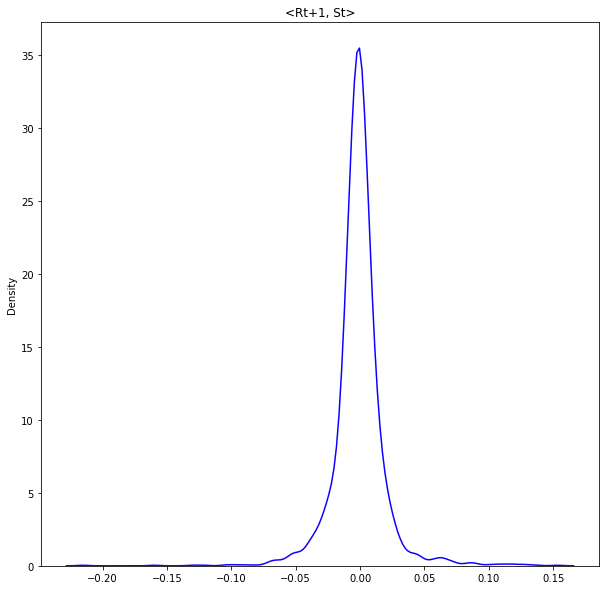

In [27]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.set_title('<Rt+1, St>')
sns.kdeplot(data=np.sum(returns.iloc[1:,:].values*S[:-1,:], axis=1), ax=ax, color='#0F00FF')